================================================================================
COMPREHENSIVE EDA VISUALIZATION SCRIPT
Conversational Transcript Dataset Analysis
================================================================================

Dataset: 5,037 conversations across 7 domains with outcome labels

Purpose: Identify causal patterns for escalation prediction



In [2]:
! pip install matplotlib seaborn
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

  Using cached matplotlib-3.10.8-cp311-cp311-win_amd64.whl.metadata (52 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.3.2-py3-none-any.whl.metadata (5.8 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   --- ------------------------------------ 0.8/8.1 MB 2.0 MB/s eta 0:00:04
   ------ --------------------------------- 1.3/8.1 MB 2.2 MB/s eta 0:00:04
   --------- ------------------------------ 1.8/8.1 MB 2.4 MB/s eta 0:00:03
   ---------- ----------------------------- 2.1/8.1 MB 2.3 MB/s eta 0:00:03
   ------------ --------------------------- 2.6/8.1 MB 2.2 MB/s eta 0:00:03
   -------------- ------------------------- 2.9/8.1 MB 2.1 MB/s eta 0:00:03
   --------------- ------------------------ 3.1/8.1 MB 2.0 MB/s eta 0:00:03
   ---------------- ----------------------- 3.4/8.1 MB 2.0 

In [3]:
# Set visual style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
# File paths
INPUT_CSV = 'Datasets/processed/transcript_dataset.csv'
INPUT_JSON = 'Datasets/processed/conversation_transcript_map.json'
OUTPUT_DIR = 'Visualisation'

# ============================================================================
# DATA LOADING AND PREPROCESSING
# ============================================================================

In [4]:
print("="*80)
print("LOADING DATA...")
print("="*80)

# Load CSV data (metadata about conversations)
df = pd.read_csv(INPUT_CSV)
print(f"✓ Loaded CSV: {len(df)} conversations")

# Load JSON data (actual conversation turns)
with open(INPUT_JSON, 'r') as f:
    conv_map = json.load(f)
print(f"✓ Loaded JSON: {len(conv_map)} conversation transcripts")

print("\n" + "="*80)
print("PREPROCESSING DATA...")
print("="*80)

# Convert timestamps to datetime
df['time_of_interaction'] = pd.to_datetime(df['time_of_interaction'])

# Extract temporal features
df['date'] = df['time_of_interaction'].dt.date
df['hour'] = df['time_of_interaction'].dt.hour  # 0-23
df['day_of_week'] = df['time_of_interaction'].dt.day_name()  # Monday, Tuesday, etc.
df['month'] = df['time_of_interaction'].dt.month_name()  # January, February, etc.

# Add conversation metrics
# Map each transcript_id to its conversation length (number of turns)
df['conversation_length'] = df['transcript_id'].map(lambda x: len(conv_map.get(x, [])))

# Create binary outcome flags
df['is_escalation'] = df['intent'].str.contains('Escalation', case=False, na=False)
df['is_multiple_issue'] = df['intent'].str.contains('Multiple', case=False, na=False)
df['is_fraud'] = df['intent'].str.contains('Fraud', case=False, na=False)

# Extract primary intent category from full intent description
def extract_primary_intent(intent):
    """
    Categorize detailed intent into primary categories
    Example: "Escalation - Repeated Service Failures" → "Escalation"
    """
    if 'Escalation' in intent:
        return 'Escalation'
    elif 'Multiple' in intent:
        return 'Multiple Issues'
    elif 'Fraud' in intent:
        return 'Fraud Alert'
    elif 'Delivery' in intent:
        return 'Delivery Issues'
    elif 'Account' in intent:
        return 'Account Issues'
    elif 'Service' in intent:
        return 'Service Issues'
    elif 'Billing' in intent or 'Payment' in intent:
        return 'Billing/Payment'
    elif 'Appointment' in intent:
        return 'Appointment'
    elif 'Claim' in intent:
        return 'Claim Issues'
    else:
        return 'Other'

df['primary_intent'] = df['intent'].apply(extract_primary_intent)

print(f"✓ Dataset shape: {df.shape}")
print(f"✓ Date range: {df['time_of_interaction'].min()} to {df['time_of_interaction'].max()}")
print(f"✓ Features created: temporal, outcome flags, primary intent categories")


LOADING DATA...
✓ Loaded CSV: 5037 conversations
✓ Loaded JSON: 5037 conversation transcripts

PREPROCESSING DATA...
✓ Dataset shape: (5037, 14)
✓ Date range: 2025-01-01 10:09:00 to 2025-12-31 20:22:00
✓ Features created: temporal, outcome flags, primary intent categories


# ============================================================================
# FIGURE 1: DOMAIN AND INTENT OVERVIEW
# ============================================================================


GENERATING FIGURE 1: DOMAIN AND INTENT OVERVIEW
✓ Figure 1 saved: Domain and Intent Overview


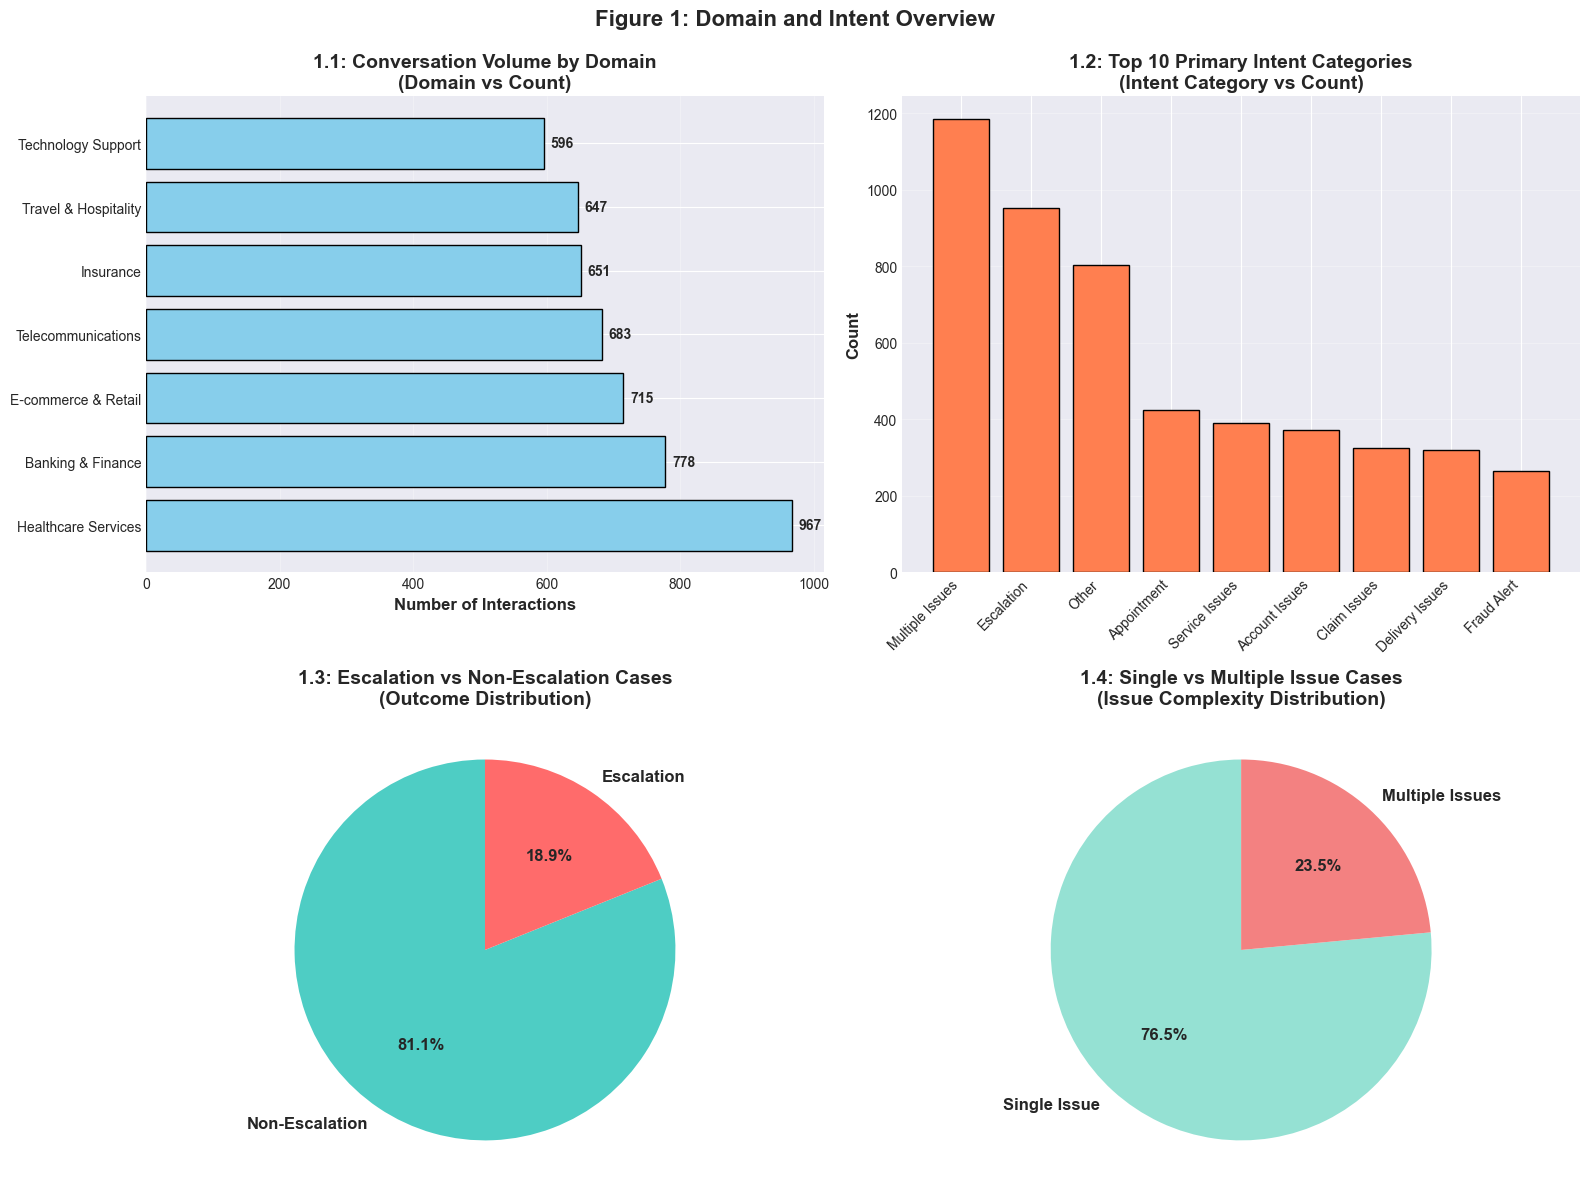

In [10]:
print("\n" + "="*80)
print("GENERATING FIGURE 1: DOMAIN AND INTENT OVERVIEW")
print("="*80)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Figure 1: Domain and Intent Overview', fontsize=16, fontweight='bold', y=0.995)
# Plot 1.1: Domain Distribution
# What: Horizontal bar chart showing conversation count per domain

domain_counts = df['domain'].value_counts()
axes[0, 0].barh(domain_counts.index, domain_counts.values, color='skyblue', edgecolor='black')
axes[0, 0].set_xlabel('Number of Interactions', fontsize=12, fontweight='bold')
axes[0, 0].set_title('1.1: Conversation Volume by Domain\n(Domain vs Count)', 
                     fontsize=14, fontweight='bold')
axes[0, 0].grid(axis='x', alpha=0.3)
# Add value labels on bars
for i, v in enumerate(domain_counts.values):
    axes[0, 0].text(v + 10, i, str(v), va='center', fontweight='bold')
# Plot 1.2: Primary Intent Distribution
# What: Bar chart of top 10 intent categories
intent_counts = df['primary_intent'].value_counts().head(10)
axes[0, 1].bar(range(len(intent_counts)), intent_counts.values, color='coral', edgecolor='black')
axes[0, 1].set_xticks(range(len(intent_counts)))
axes[0, 1].set_xticklabels(intent_counts.index, rotation=45, ha='right')
axes[0, 1].set_ylabel('Count', fontsize=12, fontweight='bold')
axes[0, 1].set_title('1.2: Top 10 Primary Intent Categories\n(Intent Category vs Count)', 
                     fontsize=14, fontweight='bold')
axes[0, 1].grid(axis='y', alpha=0.3)

# Plot 1.3: Escalation vs Non-Escalation
# What: Pie chart showing proportion of escalated conversation
escalation_data = df['is_escalation'].value_counts()
colors_pie = ['#4ecdc4', '#ff6b6b']  # Non-escalation (teal), Escalation (red)
labels = ['Non-Escalation', 'Escalation']
axes[1, 0].pie(escalation_data.values, labels=labels, 
               autopct='%1.1f%%', colors=colors_pie, startangle=90,
               textprops={'fontsize': 12, 'fontweight': 'bold'})
axes[1, 0].set_title('1.3: Escalation vs Non-Escalation Cases\n(Outcome Distribution)', 
                     fontsize=14, fontweight='bold')

# Plot 1.4: Issue Complexity
# What: Pie chart showing single vs multiple issue conversations
issue_types = pd.Series({
    'Single Issue': (~df['is_multiple_issue']).sum(),
    'Multiple Issues': df['is_multiple_issue'].sum()
})
axes[1, 1].pie(issue_types.values, labels=issue_types.index,
               autopct='%1.1f%%', colors=['#95e1d3', '#f38181'], startangle=90,
               textprops={'fontsize': 12, 'fontweight': 'bold'})
axes[1, 1].set_title('1.4: Single vs Multiple Issue Cases\n(Issue Complexity Distribution)', 
                     fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig(OUTPUT_DIR + 'fig1_domain_intent_overview.png', dpi=300, bbox_inches='tight')
print("✓ Figure 1 saved: Domain and Intent Overview")
plt.show()


# ============================================================================
# FIGURE 2: TEMPORAL ANALYSIS
# ============================================================================


GENERATING FIGURE 2: TEMPORAL ANALYSIS
✓ Figure 2 saved: Temporal Analysis


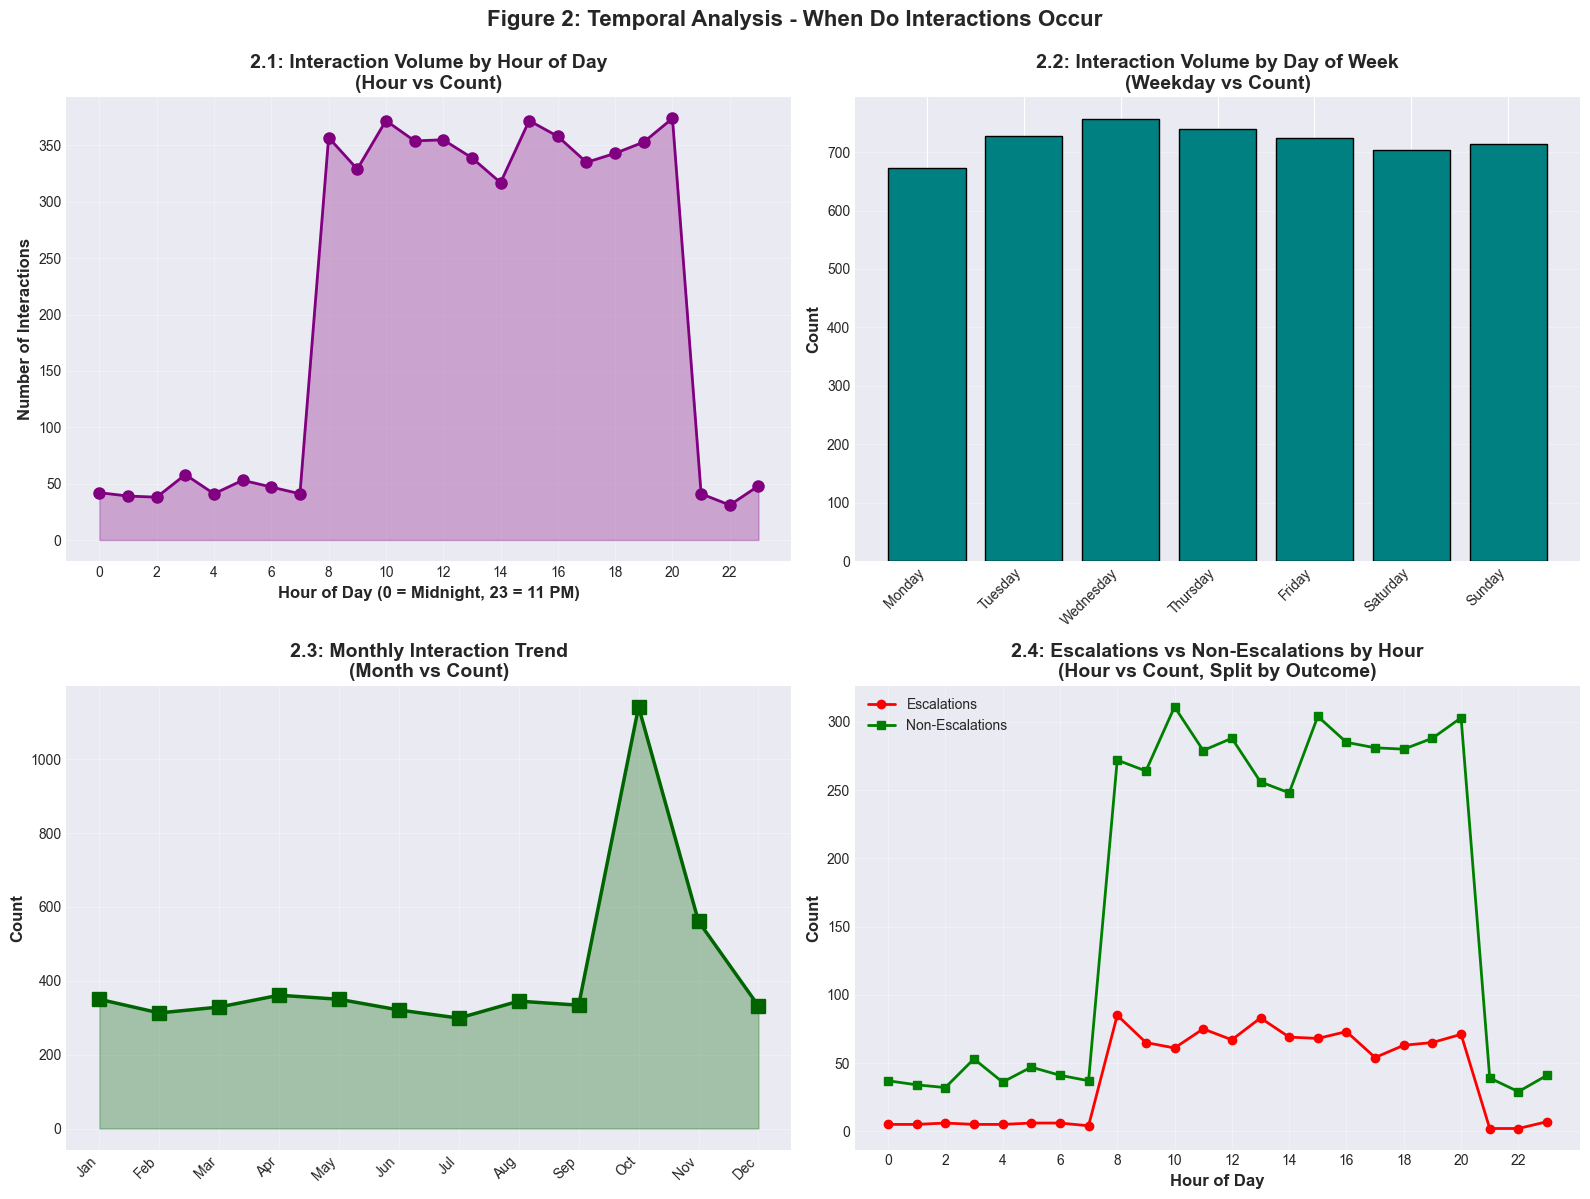

In [ ]:
print("\n" + "="*80)
print("GENERATING FIGURE 2: TEMPORAL ANALYSIS")
print("="*80)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Figure 2: Temporal Analysis - When Do Interactions Occur', 
             fontsize=16, fontweight='bold', y=0.995)


# Plot 2.1: Interactions by Hour
# What: Line chart showing conversation volume across 24 hours
hour_counts = df['hour'].value_counts().sort_index()
axes[0, 0].plot(hour_counts.index, hour_counts.values, marker='o', linewidth=2, 
                markersize=8, color='purple')
axes[0, 0].fill_between(hour_counts.index, hour_counts.values, alpha=0.3, color='purple')
axes[0, 0].set_xlabel('Hour of Day (0 = Midnight, 23 = 11 PM)', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Number of Interactions', fontsize=12, fontweight='bold')
axes[0, 0].set_title('2.1: Interaction Volume by Hour of Day\n(Hour vs Count)', 
                     fontsize=14, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].set_xticks(range(0, 24, 2))


# Plot 2.2: Interactions by Day of Week
# What: Bar chart showing conversation volume by weekday

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts = df['day_of_week'].value_counts().reindex(day_order, fill_value=0)
axes[0, 1].bar(range(len(day_counts)), day_counts.values, color='teal', edgecolor='black')
axes[0, 1].set_xticks(range(len(day_counts)))
axes[0, 1].set_xticklabels(day_counts.index, rotation=45, ha='right')
axes[0, 1].set_ylabel('Count', fontsize=12, fontweight='bold')
axes[0, 1].set_title('2.2: Interaction Volume by Day of Week\n(Weekday vs Count)', 
                     fontsize=14, fontweight='bold')
axes[0, 1].grid(axis='y', alpha=0.3)


# Plot 2.3: Monthly Trend
# What: Line chart showing conversation volume across 12 months

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
month_counts = df['month'].value_counts().reindex(month_order, fill_value=0)
axes[1, 0].plot(range(len(month_counts)), month_counts.values, marker='s', linewidth=2.5, 
                markersize=10, color='darkgreen')
axes[1, 0].fill_between(range(len(month_counts)), month_counts.values, alpha=0.3, color='darkgreen')
axes[1, 0].set_xticks(range(len(month_counts)))
axes[1, 0].set_xticklabels([m[:3] for m in month_counts.index], rotation=45, ha='right')
axes[1, 0].set_ylabel('Count', fontsize=12, fontweight='bold')
axes[1, 0].set_title('2.3: Monthly Interaction Trend\n(Month vs Count)', 
                     fontsize=14, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)


# Plot 2.4: Escalations vs Non-Escalations by Hour
# What: Comparison of escalation timing vs normal conversations

escalation_by_hour = df[df['is_escalation']].groupby('hour').size()
non_escalation_by_hour = df[~df['is_escalation']].groupby('hour').size()
axes[1, 1].plot(escalation_by_hour.index, escalation_by_hour.values, marker='o', 
                label='Escalations', linewidth=2, markersize=6, color='red')
axes[1, 1].plot(non_escalation_by_hour.index, non_escalation_by_hour.values, marker='s',
                label='Non-Escalations', linewidth=2, markersize=6, color='green')
axes[1, 1].set_xlabel('Hour of Day', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Count', fontsize=12, fontweight='bold')
axes[1, 1].set_title('2.4: Escalations vs Non-Escalations by Hour\n(Hour vs Count, Split by Outcome)', 
                     fontsize=14, fontweight='bold')
axes[1, 1].legend(fontsize=10)
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].set_xticks(range(0, 24, 2))

plt.tight_layout()
plt.savefig(OUTPUT_DIR + 'fig2_temporal_analysis.png', dpi=300, bbox_inches='tight')
print("✓ Figure 2 saved: Temporal Analysis")
plt.show()

# ============================================================================
# FIGURE 3: CONVERSATION LENGTH ANALYSIS
# ============================================================================


GENERATING FIGURE 3: CONVERSATION LENGTH ANALYSIS
✓ Figure 3 saved: Conversation Length Analysis


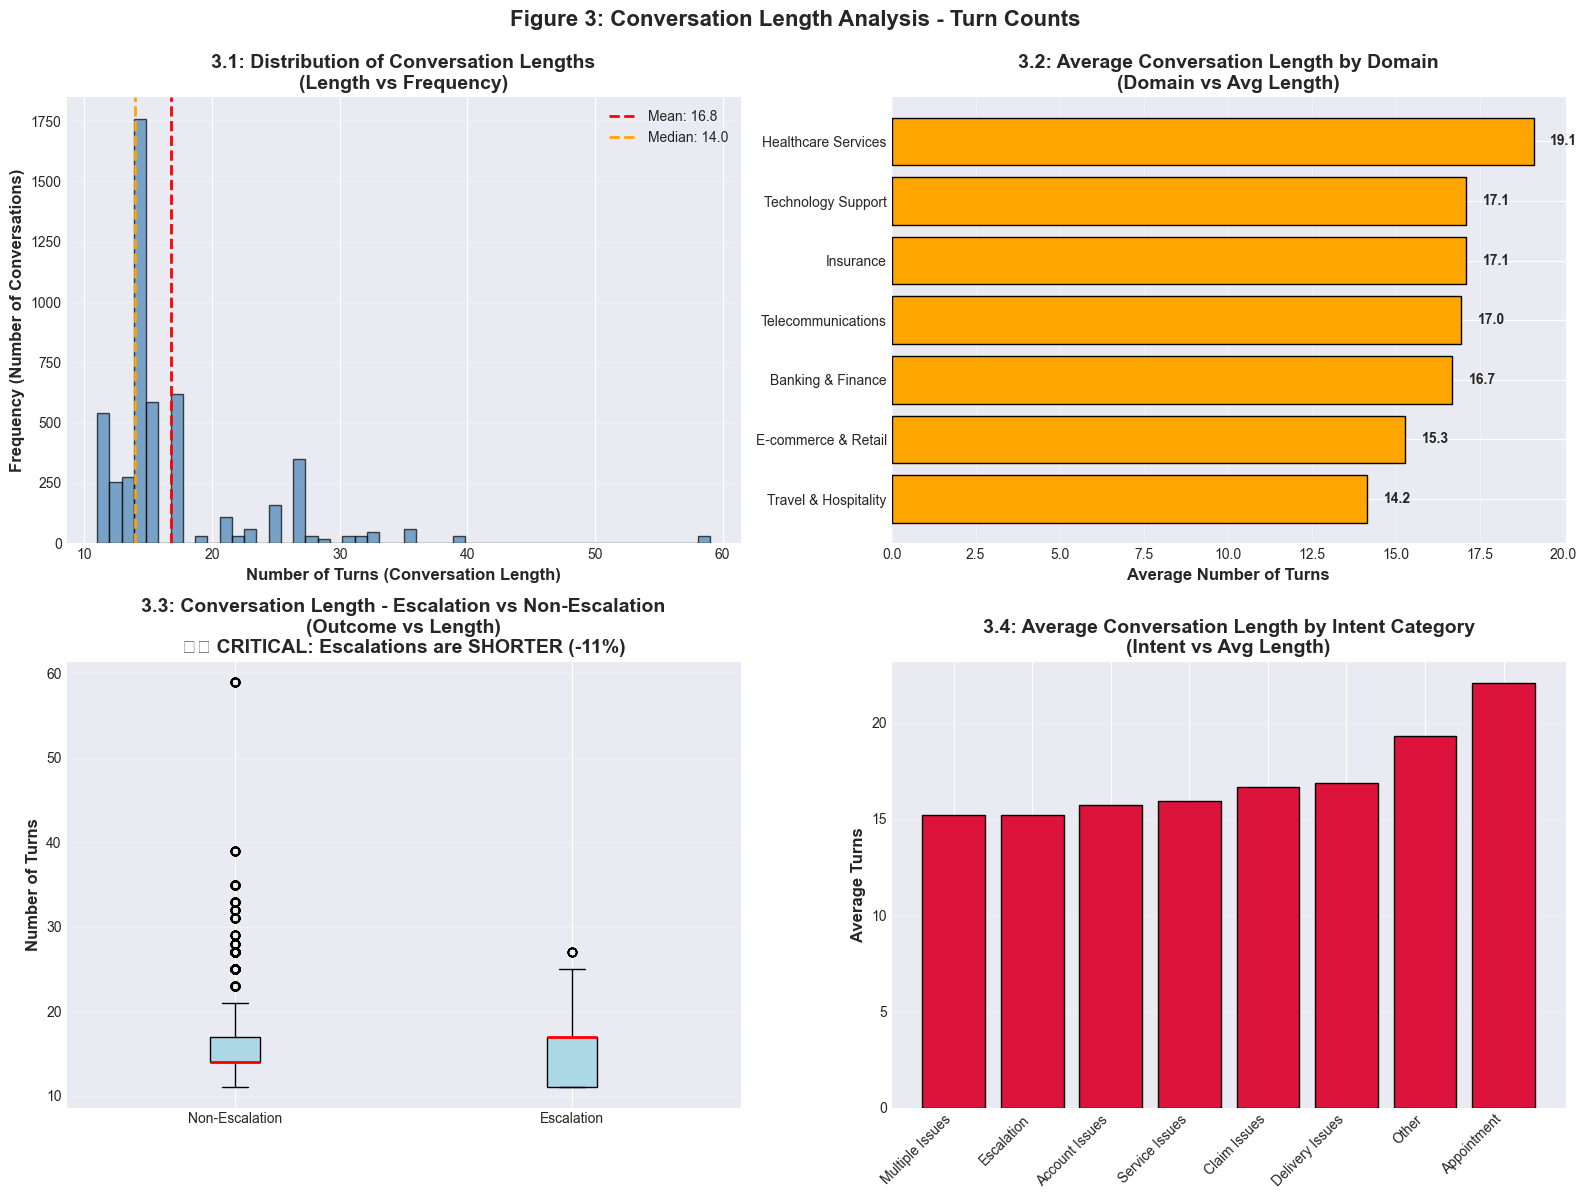

In [14]:
print("\n" + "="*80)
print("GENERATING FIGURE 3: CONVERSATION LENGTH ANALYSIS")
print("="*80)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Figure 3: Conversation Length Analysis - Turn Counts', 
             fontsize=16, fontweight='bold', y=0.995)


# Plot 3.1: Distribution of Conversation Lengths
# What: Histogram showing how conversation lengths are distributed
axes[0, 0].hist(df['conversation_length'], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
# Add mean and median lines
mean_length = df['conversation_length'].mean()
median_length = df['conversation_length'].median()
axes[0, 0].axvline(mean_length, color='red', linestyle='--', 
                   linewidth=2, label=f'Mean: {mean_length:.1f}')
axes[0, 0].axvline(median_length, color='orange', linestyle='--',
                   linewidth=2, label=f'Median: {median_length:.1f}')
axes[0, 0].set_xlabel('Number of Turns (Conversation Length)', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Frequency (Number of Conversations)', fontsize=12, fontweight='bold')
axes[0, 0].set_title('3.1: Distribution of Conversation Lengths\n(Length vs Frequency)', 
                     fontsize=14, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(axis='y', alpha=0.3)


# Plot 3.2: Average Conversation Length by Domain
# What: Horizontal bar chart of average turns per domain

domain_conv_length = df.groupby('domain')['conversation_length'].mean().sort_values()
axes[0, 1].barh(domain_conv_length.index, domain_conv_length.values, color='orange', edgecolor='black')
axes[0, 1].set_xlabel('Average Number of Turns', fontsize=12, fontweight='bold')
axes[0, 1].set_title('3.2: Average Conversation Length by Domain\n(Domain vs Avg Length)', 
                     fontsize=14, fontweight='bold')
axes[0, 1].grid(axis='x', alpha=0.3)
# Add value labels
for i, v in enumerate(domain_conv_length.values):
    axes[0, 1].text(v + 0.5, i, f'{v:.1f}', va='center', fontweight='bold')


# Plot 3.3: Escalation vs Non-Escalation Conversation Length
# What: Box plot comparing length distributions

escalation_lengths = df[df['is_escalation']]['conversation_length']
non_escalation_lengths = df[~df['is_escalation']]['conversation_length']
axes[1, 0].boxplot([non_escalation_lengths, escalation_lengths], 
                    labels=['Non-Escalation', 'Escalation'],
                    patch_artist=True,
                    boxprops=dict(facecolor='lightblue', color='black'),
                    medianprops=dict(color='red', linewidth=2),
                    whiskerprops=dict(color='black'),
                    capprops=dict(color='black'))
axes[1, 0].set_ylabel('Number of Turns', fontsize=12, fontweight='bold')
axes[1, 0].set_title('3.3: Conversation Length - Escalation vs Non-Escalation\n(Outcome vs Length)\n⚠️ CRITICAL: Escalations are SHORTER (-11%)', 
                     fontsize=14, fontweight='bold')
axes[1, 0].grid(axis='y', alpha=0.3)


# Plot 3.4: Average Conversation Length by Intent Category
# What: Bar chart of average length per intent type
top_intents = df['primary_intent'].value_counts().head(8).index
intent_conv_length = df[df['primary_intent'].isin(top_intents)].groupby('primary_intent')['conversation_length'].mean().sort_values()
axes[1, 1].bar(range(len(intent_conv_length)), intent_conv_length.values, color='crimson', edgecolor='black')
axes[1, 1].set_xticks(range(len(intent_conv_length)))
axes[1, 1].set_xticklabels(intent_conv_length.index, rotation=45, ha='right')
axes[1, 1].set_ylabel('Average Turns', fontsize=12, fontweight='bold')
axes[1, 1].set_title('3.4: Average Conversation Length by Intent Category\n(Intent vs Avg Length)', 
                     fontsize=14, fontweight='bold')
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig(OUTPUT_DIR + 'fig3_conversation_length_analysis.png', dpi=300, bbox_inches='tight')
print("✓ Figure 3 saved: Conversation Length Analysis")
plt.show()


# ============================================================================
# FIGURE 4: DOMAIN-INTENT HEATMAP
# ============================================================================


GENERATING FIGURE 4: DOMAIN-INTENT HEATMAP
✓ Figure 4 saved: Domain-Intent Heatmap


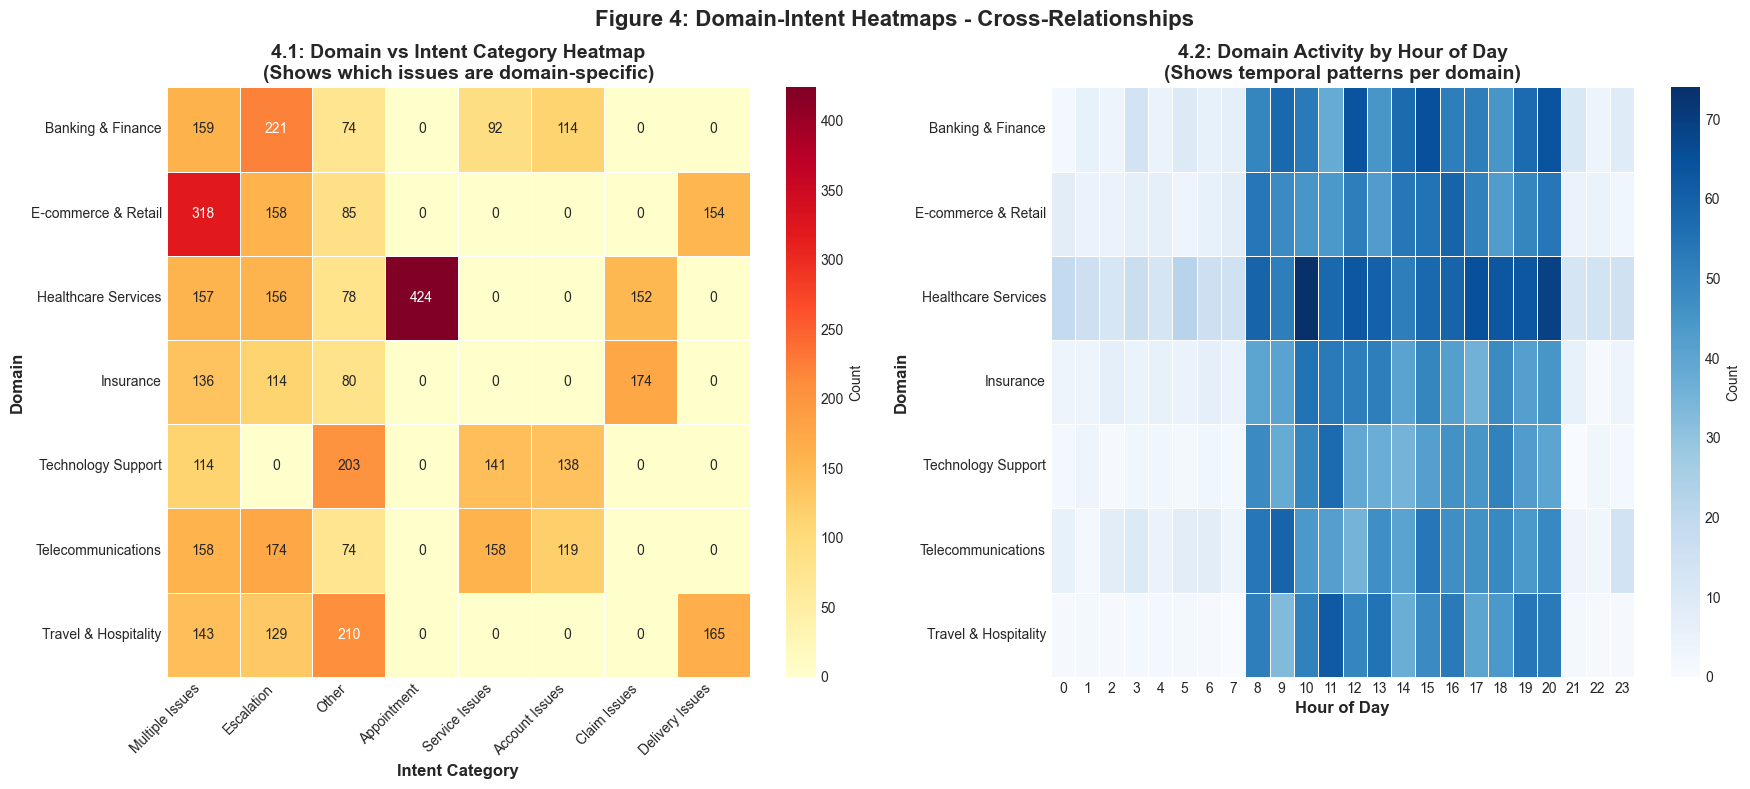

In [15]:
print("\n" + "="*80)
print("GENERATING FIGURE 4: DOMAIN-INTENT HEATMAP")
print("="*80)

fig, axes = plt.subplots(1, 2, figsize=(18, 8))
fig.suptitle('Figure 4: Domain-Intent Heatmaps - Cross-Relationships', 
             fontsize=16, fontweight='bold', y=0.98)


# Plot 4.1: Domain vs Primary Intent Heatmap
# What: Heatmap showing count of each intent type per domain

domain_intent = pd.crosstab(df['domain'], df['primary_intent'])
top_intents_heat = df['primary_intent'].value_counts().head(8).index
domain_intent_filtered = domain_intent[top_intents_heat]

sns.heatmap(domain_intent_filtered, annot=True, fmt='d', cmap='YlOrRd', 
            cbar_kws={'label': 'Count'}, ax=axes[0], linewidths=0.5)
axes[0].set_title('4.1: Domain vs Intent Category Heatmap\n(Shows which issues are domain-specific)', 
                  fontsize=14, fontweight='bold')
axes[0].set_xlabel('Intent Category', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Domain', fontsize=12, fontweight='bold')
plt.setp(axes[0].get_xticklabels(), rotation=45, ha='right')

# Plot 4.2: Domain vs Hour Heatmap
# What: Heatmap showing when each domain receives calls

domain_hour = pd.crosstab(df['domain'], df['hour'])
sns.heatmap(domain_hour, cmap='Blues', cbar_kws={'label': 'Count'}, 
            ax=axes[1], linewidths=0.5)
axes[1].set_title('4.2: Domain Activity by Hour of Day\n(Shows temporal patterns per domain)', 
                  fontsize=14, fontweight='bold')
axes[1].set_xlabel('Hour of Day', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Domain', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig(OUTPUT_DIR + 'fig4_domain_intent_heatmap.png', dpi=300, bbox_inches='tight')
print("✓ Figure 4 saved: Domain-Intent Heatmap")
plt.show()


# ============================================================================
# FIGURE 5: DETAILED INTENT ANALYSIS
# ============================================================================


GENERATING FIGURE 5: DETAILED INTENT ANALYSIS
✓ Figure 5 saved: Detailed Intent Analysis


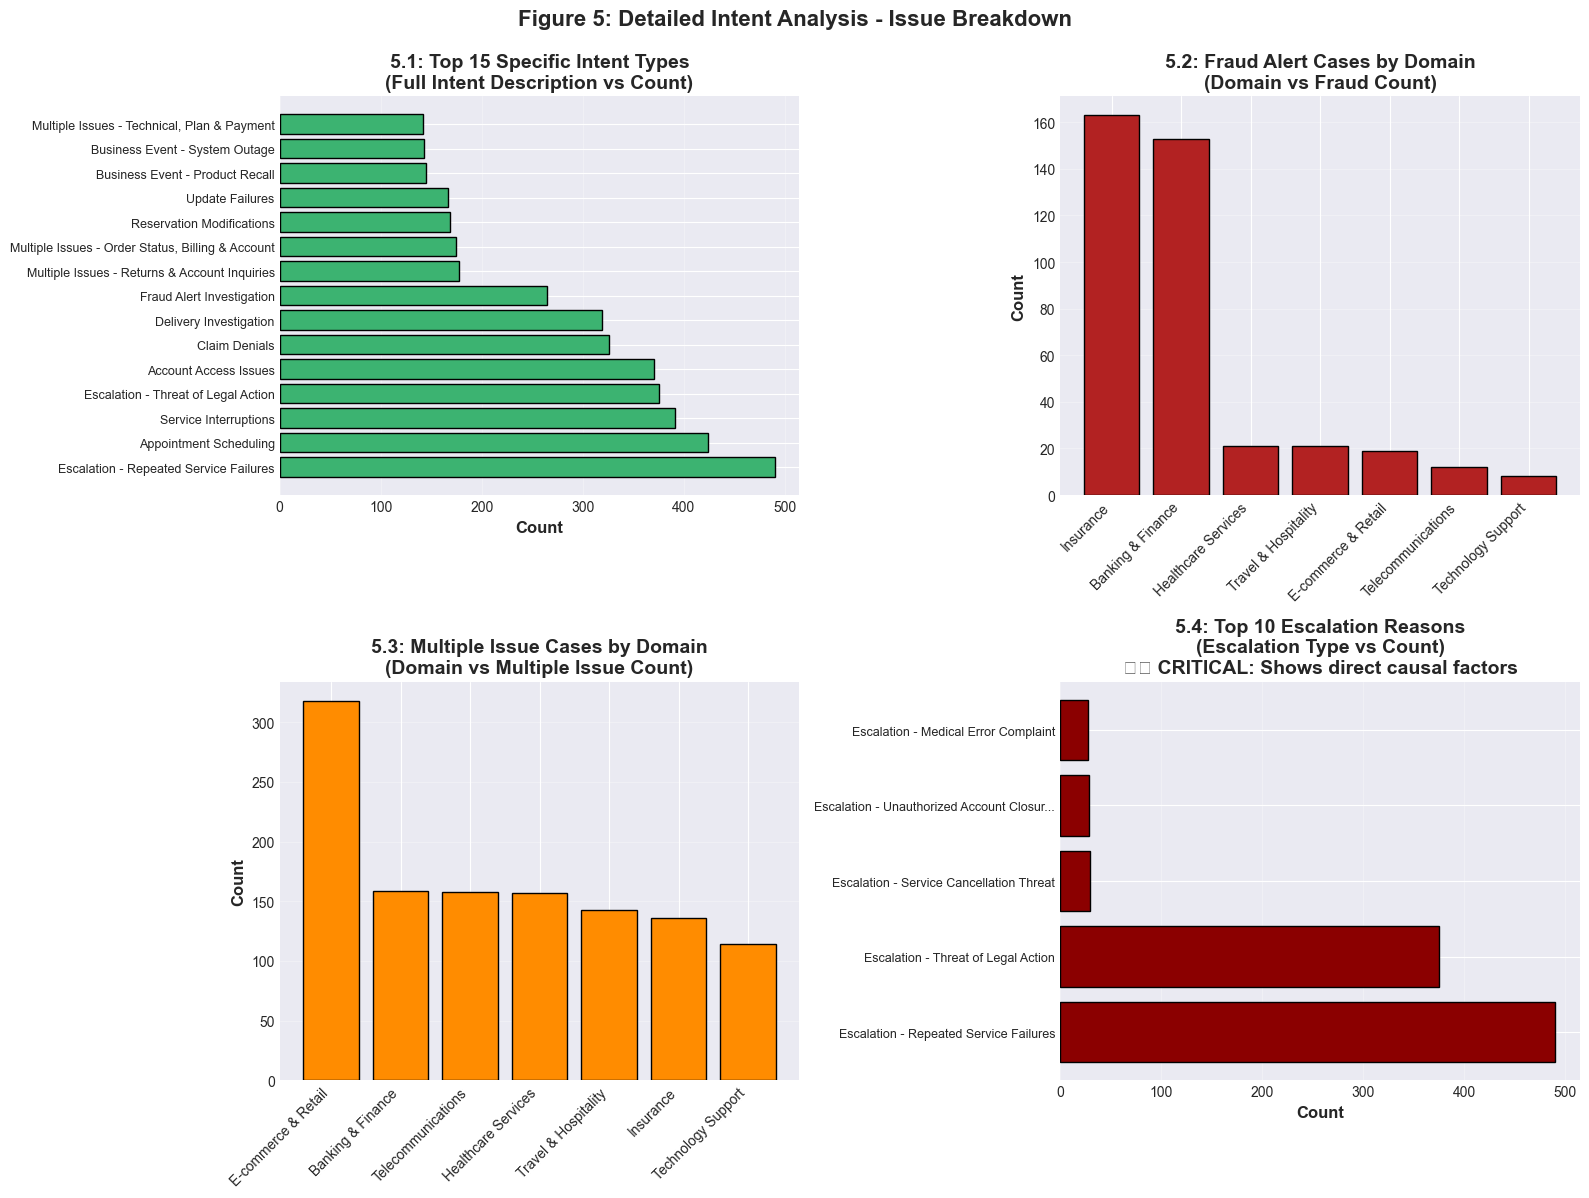

In [16]:
print("\n" + "="*80)
print("GENERATING FIGURE 5: DETAILED INTENT ANALYSIS")
print("="*80)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Figure 5: Detailed Intent Analysis - Issue Breakdown', 
             fontsize=16, fontweight='bold', y=0.995)


# Plot 5.1: Top 15 Full Intent Types
# What: Horizontal bar of most common specific intents (full text)

top_intents_full = df['intent'].value_counts().head(15)
axes[0, 0].barh(range(len(top_intents_full)), top_intents_full.values, 
                color='mediumseagreen', edgecolor='black')
axes[0, 0].set_yticks(range(len(top_intents_full)))
# Truncate long labels
axes[0, 0].set_yticklabels([label[:50] + '...' if len(label) > 50 else label 
                            for label in top_intents_full.index], fontsize=9)
axes[0, 0].set_xlabel('Count', fontsize=12, fontweight='bold')
axes[0, 0].set_title('5.1: Top 15 Specific Intent Types\n(Full Intent Description vs Count)', 
                     fontsize=14, fontweight='bold')
axes[0, 0].grid(axis='x', alpha=0.3)


# Plot 5.2: Fraud Cases by Domain
# What: Bar chart showing fraud alert distribution across domains

fraud_by_domain = df[df['is_fraud']].groupby('domain').size().sort_values(ascending=False)
axes[0, 1].bar(range(len(fraud_by_domain)), fraud_by_domain.values, 
               color='firebrick', edgecolor='black')
axes[0, 1].set_xticks(range(len(fraud_by_domain)))
axes[0, 1].set_xticklabels(fraud_by_domain.index, rotation=45, ha='right')
axes[0, 1].set_ylabel('Count', fontsize=12, fontweight='bold')
axes[0, 1].set_title('5.2: Fraud Alert Cases by Domain\n(Domain vs Fraud Count)', 
                     fontsize=14, fontweight='bold')
axes[0, 1].grid(axis='y', alpha=0.3)


# Plot 5.3: Multiple Issues by Domain
# What: Bar chart of multiple-issue conversations per domain

multiple_by_domain = df[df['is_multiple_issue']].groupby('domain').size().sort_values(ascending=False)
axes[1, 0].bar(range(len(multiple_by_domain)), multiple_by_domain.values, 
               color='darkorange', edgecolor='black')
axes[1, 0].set_xticks(range(len(multiple_by_domain)))
axes[1, 0].set_xticklabels(multiple_by_domain.index, rotation=45, ha='right')
axes[1, 0].set_ylabel('Count', fontsize=12, fontweight='bold')
axes[1, 0].set_title('5.3: Multiple Issue Cases by Domain\n(Domain vs Multiple Issue Count)', 
                     fontsize=14, fontweight='bold')
axes[1, 0].grid(axis='y', alpha=0.3)


# Plot 5.4: Top Escalation Reasons
# What: Horizontal bar of top 10 specific escalation causes

escalation_df = df[df['is_escalation']]
escalation_reasons = escalation_df['intent'].value_counts().head(10)
axes[1, 1].barh(range(len(escalation_reasons)), escalation_reasons.values, 
                color='darkred', edgecolor='black')
axes[1, 1].set_yticks(range(len(escalation_reasons)))
# Truncate labels
axes[1, 1].set_yticklabels([label[:40] + '...' if len(label) > 40 else label 
                            for label in escalation_reasons.index], fontsize=9)
axes[1, 1].set_xlabel('Count', fontsize=12, fontweight='bold')
axes[1, 1].set_title('5.4: Top 10 Escalation Reasons\n(Escalation Type vs Count)\n⚠️ CRITICAL: Shows direct causal factors', 
                     fontsize=14, fontweight='bold')
axes[1, 1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig(OUTPUT_DIR + 'fig5_detailed_intent_analysis.png', dpi=300, bbox_inches='tight')
print("✓ Figure 5 saved: Detailed Intent Analysis")
plt.show()
